In [14]:
"""
Today we will be taking a look at gaussian mixture models, one of the most expansive things SeaLion has to 
offer. Before proceeding I recommend you know what KMeans are, as Gaussian Mixture Models (GMMs) are really 
just an expanded version of KMeans. GMMs are very useful for unsupervised clustering and anomaly detection.
"""

# first we'll import, then I'll talk some more about GMMs
import sealion as sl 
from sealion.mixtures import GaussianMixture
from sealion.DimensionalityReduction import PCA # we'll need this later

In [21]:
"""
In KMeans, your data is assumed to be circles the exact same size and shape. What if you do have circles, but
your data also has ovals - some of which are tall, some are skinny, some are big, some are small, etc. Basically 
you have clusters of the same general oval/circle shape but in different sizes and shapes. 

These clusters are actually gaussian (normal) distributions. You can keep in mind their center by finding their
mean, and you can also learn about their shape (tall or wide) by finding their standard deviation. Some clusters
maybe the same shape but bigger than others, and that is also accounted for by a mixture weight coefficient
multiplied by each gaussian distribution. There are as many gaussian distributions in your data as there are 
clusters. 

If you are using data that is in more than one dimension, you need to use a multivariate gaussian distribution
(just means a gaussian distribution extended to higher dimensions) where the mean will be a vector and the standard deviation 
will be replaced with the covariance matrix. The way these parameters are found is through an iterative algorithm 
(first start with a guess, then improve) known as Expectation-Maximization, which you may want to read about. 

To recap - GMMs is just KMeans but a clusters shape and size are also taken into consideration.
"""

# before we use a gaussian mixture, we'll probably want some data
# for that we can use the iris dataset
from sklearn.datasets import load_iris # in the interest of time, load it here 
from sklearn.model_selection import train_test_split

X, y = load_iris()['data'], load_iris()['target']

pca = PCA(2)
X = pca.transform(X) # transform X to 2D so we can visualize it later

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
# you may be asking why we have to have a train and test set
# the reason why is because we can actually train a GMM on X_train and then ask it to predict on X_test. 
# It will just use the parameters it learn from X_train and apply that to X_test when predicting .
# we'll go over how it predicts in a bit. 

# to set up the GMM : 
gmm = GaussianMixture(n_clusters = 3, retries = 3, max_iters = 200, kmeans_init = True) 

# let's go over each of the parameters one by one : 

# n_clusters : the number of clusters you think your data has. We know it is 3

# retries : GMMs often times, just like KMeans, vary a lot on the initialization of its parameters
# so we may need to retry it mulitple times and keep the best solution. The default is 3 here on the number
# of times we will retry Expectation-Maximization (EM).

# max_iters : for each retry we run the EM algorithm. The maximum amount of iterations for a given run of 
# EM is this parameter. Default 200. 

# kmeans_init : to find the means initialization of a GMM, you can actually run KMeans on the data and then use  
# the centroids found as the mean initialization of the GMM. This is typically quicker than starting with
# a random guess. Default is True here. If your data is one-dimensional, or univariate, kmeans initialization 
# isn't possible. If you are going to use many retries, setting this parameter as True may not always be a 
# good option because it may lead to similar solutions each time. 

In [23]:
# to train this GMM : 
gmm.fit(X_train) # it is running the algorithm 3 times to find the best parameters here 

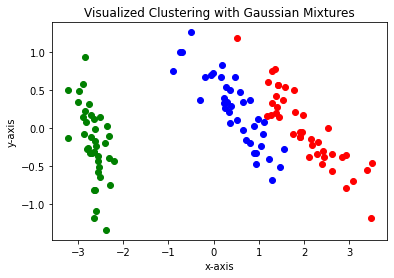

In [24]:
# we can visualize this!
color_dict = {0 : "green", 1 : "red", 2 : "blue"} # cluster : color in plot
gmm.visualize_clustering(color_dict) 

# looks pretty good!

In [25]:
# to predict on this GMM : 
gmm.predict(X_test)

# here's how the predict method worked : 
# For each data point, it measures its probability to being in a certain cluster by putting it on that
# gaussian function for that cluster (based on the parameters the GMM learnt).
# Then whichever cluster has the highest probability for a given data point is given as the prediction 
# for that data point. 

array([2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

In [29]:
# to get the probability that a given data point belongs to any given cluster you can do 
probability_matrix = gmm.soft_predict(X_test) # soft stands for probabilities
probability_matrix

array([[2.35443030e-079, 7.10948298e-002, 9.28905170e-001],
       [1.00000000e+000, 9.73265516e-057, 1.14087629e-035],
       [2.10892702e-238, 1.00000000e+000, 6.02151249e-014],
       [1.04729178e-074, 1.67352686e-002, 9.83264731e-001],
       [1.50964169e-092, 2.78163369e-002, 9.72183663e-001],
       [1.00000000e+000, 7.51784671e-049, 2.38875998e-030],
       [2.49810743e-039, 1.45028835e-006, 9.99998550e-001],
       [2.00439528e-119, 8.27564339e-001, 1.72435661e-001],
       [1.53856802e-084, 9.12321919e-001, 8.76780815e-002],
       [1.25640588e-050, 7.73940849e-005, 9.99922606e-001],
       [3.04070008e-108, 6.41656542e-001, 3.58343458e-001],
       [1.00000000e+000, 4.04967276e-040, 1.04636174e-024],
       [1.00000000e+000, 1.66206405e-058, 5.05328712e-038],
       [1.00000000e+000, 5.96262517e-041, 4.19620278e-025],
       [1.00000000e+000, 2.28499308e-055, 1.33691976e-035],
       [1.30908055e-081, 9.37453780e-004, 9.99062546e-001],
       [2.63206679e-150, 9.99998522e-001

In [30]:
# here the Nth row and the kth column gives you the probability the Nth data point in X_test belonging to the 
# kth cluster. 

# before we move onto GMMs, you're probably wondering about how to find the value k (n_clusters). Luckily, you can 
# use the same elbow method as you did in KMeans. However, you cannot just use the same inertia scoring, because
# if the clusters are all different sizes and shapes, then obviously the distances will vary for each cluster.

# instead you can use metrics called BIC and AIC (lower is better for both) to evaluate a GMM 
# both are based on how well the likelihood function of the GMM has been maximized

print("AIC : ", gmm.aic())
print("BIC : ", gmm.bic())

AIC :  459.088623046875
BIC :  484.1760559082031


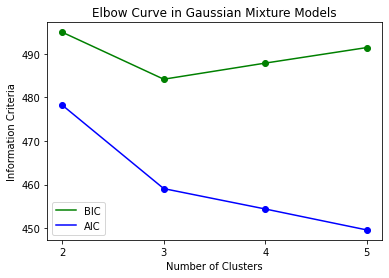

In [31]:
# we can then visualize the AIC and BIC for a GMM when the number of clusters it has is from 2 - 5
gmm.visualize_elbow_curve(min_n_clusters = 2, max_n_clusters = 5)

In [11]:
# we see a clear elbow at three, so we'll stick with it

# Onto anomaly detection! An anomaly is simply something we think doesn't fit the general pattern of the data. 
# A point for example that is in a cluster can be an anomaly if it is very far from the mean of the cluster
# is in and all the other clusters. We can get the "confidence" a certain point belongs in the data based on 
# the probability it has in the cluster it has the highest probability in (and ultimately chosen in.) Think 
# about it - points that are far from all of the clusters will have a low probability of belonging in the data, 
# whereas points that are really close to the mean of a cluster will have a high probability of belonging in the data.
# We classify the former as anomalies.

# to find the "confidence" each data point belongs in the data you can do : 
confidence_samples = gmm.confidence_samples(X_train) # we'll use X_train here

array([1.        , 1.        , 0.99999944, 1.        , 1.        ,
       0.99999982, 0.99996967, 1.        , 1.        , 1.        ,
       0.99999799, 0.99957347, 0.99990354, 1.        , 1.        ,
       0.99998942, 0.86388692, 0.99704567, 0.99999675, 1.        ,
       0.99977442, 1.        , 0.96980843, 1.        , 1.        ,
       0.99975049, 1.        , 1.        , 1.        , 0.99963701,
       0.99939955, 1.        , 1.        , 1.        , 0.9981506 ,
       1.        , 0.99986607, 0.99998957, 1.        , 0.99998066,
       1.        , 1.        , 0.97369134, 0.99999799, 0.99990489,
       0.9164855 , 1.        , 0.98493915, 1.        , 0.99999463,
       0.99999706, 1.        , 1.        , 0.99994395, 0.75394813,
       1.        , 1.        , 1.        , 1.        , 0.80661509,
       0.99999974, 1.        , 0.99349916, 0.99999939, 1.        ,
       0.99780742, 1.        , 1.        , 0.99983737, 0.99968626,
       1.        , 1.        , 1.        , 0.92116832, 1.     

In [13]:
# the points which are in the lowest _threshold_ (you choose this) percent of the confidences_samples
# are probably the outliers. Hence we have a built in method for this :  

gmm.anomaly_detect(X_train, threshold = 10) # returns whether each sample in X_train is an anomaly or not

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# essentially the threshold parameter is the percent of the data you think are anomalies. 

# Well that's it for this tutorial. We hope you enjoyed it! Thanks!